In [1]:
import numpy as np

MARKER_SIZE = 9

In [2]:
N_vector = np.linspace(10, 1000, 20) * 1000
N = N_vector.reshape(len(N_vector), 1)
m_vector = np.asarray([30, 90, 150])
m = m_vector.reshape(1, len(m_vector))

multiplier_m  = 3

# n = N / np.log(N)
n = (np.ones(20) * 2000).reshape(20, 1)

cs_mem = (N @ (m**2)/ 2 + N @ m) * 8 / 1e9
bc_mem = (N**2 / (n) + multiplier_m * N @ m /2 + multiplier_m * (n**2) @ m / 2 + multiplier_m * n @ m + N) * 8 / 1e9

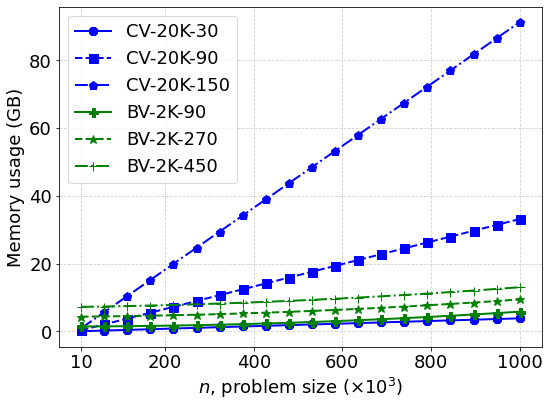

In [6]:
import matplotlib.pyplot as plt
import numpy as np

xx = [10, 200, 400, 600, 800, 1000]

# Plotting
plt.rcParams['font.size'] = 18  # You can set any numeric value here
plt.figure(figsize=(8, 6))

# cs_mem with blue lines and different linestyles
linestyles = ['-', '--', '-.']
markers = ["8", "s", "p", "P", "*", "+", "D", "v", "^"]
for i in range(cs_mem.shape[1]):
    plt.plot(N_vector/1000, cs_mem[:, i], color='blue', markersize = MARKER_SIZE, marker=markers[i], linewidth=2, linestyle=linestyles[i], label=f'CV-20K-{m_vector[i]}')

# bc_mem with green lines and different linestyles
for i in range(bc_mem.shape[1]):
    plt.plot(N_vector/1000, bc_mem[:, i], color='green', markersize = MARKER_SIZE, marker=markers[i + cs_mem.shape[1]], linewidth=2,linestyle=linestyles[i], label=f'BV-2K-{multiplier_m * m_vector[i]}')

plt.xlabel(r'$n$, problem size ($\times 10^3$)')
plt.ylabel('Memory usage (GB)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(xx, xx)
# plt.title('')
plt.legend()
plt.tight_layout()
plt.savefig(f'./fig/perf_mem.pdf')
plt.show()


In [4]:
cs_time = (N @ (m**3)/3) * 8 / 1e9
bc_time = (n * (N / n)**3 /3 
           + n @ ((multiplier_m * m)**3) / 3 
           + 2 * n * (N / n)**2 @ (multiplier_m * m)
           ) * 8 / 1e9

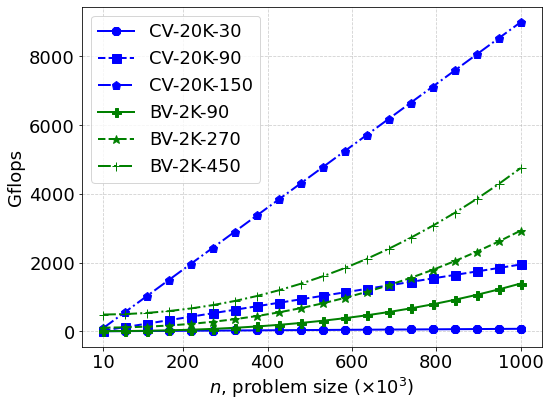

In [5]:
import matplotlib.pyplot as plt
import numpy as np

xx = [10, 200, 400, 600, 800, 1000]

# Plotting
plt.rcParams['font.size'] = 18  # You can set any numeric value here
plt.figure(figsize=(8, 6))

# cs_mem with blue lines and different linestyles
linestyles = ['-', '--', '-.']
markers = ["8", "s", "p", "P", "*", "+", "D", "v", "^"]
for i in range(cs_mem.shape[1]):
    plt.plot(N_vector/1000, cs_time[:, i], color='blue', markersize = MARKER_SIZE, marker=markers[i], linewidth=2, linestyle=linestyles[i], label=f'CV-20K-{m_vector[i]}')

# bc_mem with green lines and different linestyles
for i in range(bc_mem.shape[1]):
    plt.plot(N_vector/1000, bc_time[:, i], color='green', markersize = MARKER_SIZE, marker=markers[i + cs_mem.shape[1]], linewidth=2,linestyle=linestyles[i], label=f'BV-2K-{multiplier_m * m_vector[i]}')

plt.xlabel(r'$n$, problem size ($\times 10^3$)')
plt.ylabel('Gflops')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(xx, xx)
# plt.title('')
plt.legend()
plt.tight_layout()
plt.savefig(f'./fig/perf_compu.pdf')
plt.show()
